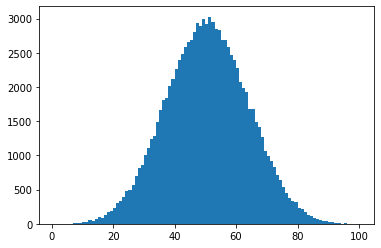

In [1]:
from scipy import stats
import numpy
import matplotlib.pyplot as pyplot
from statsmodels.stats.weightstats import ttest_ind
import math

distrA = stats.norm(loc=0, scale=1)
distrB = stats.norm(loc=0, scale=1)
MonteCarlo_sample = []
numpy.random.seed(102)

for i in range(100000):
    sampleA = list(distrA.rvs(size=10))
    sampleB = list(distrB.rvs(size=10))
    
    MonteCarlo_sample.append(
        sum(stats.rankdata(sampleA + sampleB)[0:len(sampleB)]) - (len(sampleB) * (len(sampleB) + 1) / 2)
    )

pyplot.hist(MonteCarlo_sample, bins=range(math.floor(min(MonteCarlo_sample)), math.ceil(max(MonteCarlo_sample)) + 1));

In [5]:
numpy.percentile(MonteCarlo_sample, q=97.5)

76.0

In [6]:
numpy.percentile(MonteCarlo_sample, q=2.5)

24.0

In [12]:
def my_mw_criterion(sampleA_of_size10, sampleB_of_size10):
    U = sum(stats.rankdata(sampleA + sampleB)[0:len(sampleB)]) - (len(sampleB) * (len(sampleB) + 1) / 2)
    if U < 24 or U > 76:
        return 1
    else:
        return 0

In [13]:
fp = 0
numpy.random.seed(101)

distrA = stats.norm(loc=0, scale=1)
distrB = stats.norm(loc=0, scale=1)

for i in range(100000):
    sampleA = list(distrA.rvs(size=10))
    sampleB = list(distrB.rvs(size=10))
    
    fp += my_mw_criterion(sampleA, sampleB)
    
fp

4354

In [14]:
fp = 0
numpy.random.seed(101)


distrA = stats.expon(loc=2, scale=3)
distrB = stats.expon(loc=2, scale=3)

for i in range(100000):
    sampleA = list(distrA.rvs(size=10))
    sampleB = list(distrB.rvs(size=10))
    
    fp += my_mw_criterion(sampleA, sampleB)
    
fp

4320

In [16]:

fp = 0
fp_lib = 0
numpy.random.seed(101)

distrA = stats.binom(p=0.5, n=1)
distrB = stats.binom(p=0.5, n=1)

for i in range(100000):
    sampleA = list(distrA.rvs(size=10))
    sampleB = list(distrB.rvs(size=10))
    
    fp += my_mw_criterion(sampleA, sampleB)
    fp_lib += stats.mannwhitneyu(sampleA, sampleB)[1] <= 0.05
    
print(fp)
print(fp_lib)

1188
4268


In [17]:

fp = 0
fp_lib = 0
numpy.random.seed(101)

distrA = stats.binom(p=0.5, n=10)
distrB = stats.binom(p=0.5, n=10)

for i in range(100000):
    sampleA = list(distrA.rvs(size=10))
    sampleB = list(distrB.rvs(size=10))
    
    fp += my_mw_criterion(sampleA, sampleB)
    fp_lib += stats.mannwhitneyu(sampleA, sampleB)[1] <= 0.05
    
print(fp)
print(fp_lib)

3882
4376
